In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [9]:
# reading and loading the data

data =  pd.read_csv('d.csv')
data.head()

,x1,x2,y
0,0.336494,-0.985951,0.0
1,-0.011043,-0.105529,0.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,0.0


In [11]:
# Rading and Plotting the data 

X = np.array(data[['x1','x2']])
y = np.array(data['y'])
np.random.seed(42)

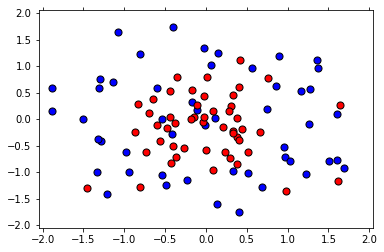

In [12]:
    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

In [17]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import make_scorer,f1_score

#fixing a random seed 
import random
random.seed(42)

# spliting the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42 )

In [20]:
#Fitting  a Decision Tree model 

from sklearn.tree  import DecisionTreeClassifier 

clf = DecisionTreeClassifier(random_state= 42)

# fitting the model 
clf.fit(X_train, y_train)

# making the predictions 
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [23]:
# making the plots 

def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

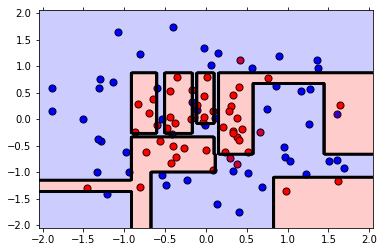

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


In [24]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

We can see here the case of overfitting the model(since it is not generalized ).<br>
<br>
Now our Target is to Improve the model with the `grid search `.We can do this in following steps 
* First define some parameters to perform grid search on. We suggest to play with max_depth, min_samples_leaf, and min_samples_split.
* Make a scorer for the model using f1_score.
* Perform grid search on the classifier, using the parameters and the scorer.
* Fit the data to the new classifier.
* Plot the model and find the f1_score.
* If the model is not much better, try changing the ranges for the parameters and fit it again.



In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

parameters = {'max_depth':[1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[2,3,4,5]}
scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X, y)

best_clf = grid_fit.best_estimator_

In [28]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion=&#39;gini&#39;, max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter=&#39;best&#39;)

In [29]:
#making the predictions 
train_predictions = best_clf.predict(X_train)
test_predictions = best_clf.predict(X_test)

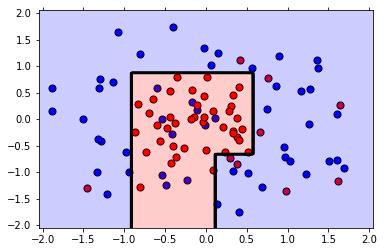

In [31]:
plot_model(X, y, best_clf)